In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
import keras.models as Model
from keras.datasets import mnist
from keras.optimizers import Adam,SGD,RMSprop
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Input,AveragePooling2D
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

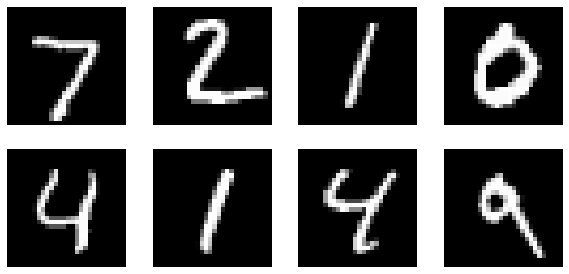

In [ ]:
plt.figure(figsize=(10,10))
for i in range(8):
  plt.subplot(4,4,i+1)
  plt.axis('off')
  plt.imshow(x_test[i],cmap='gray')

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0
np.max(x_train),np.max(x_test)

(1.0, 1.0)

In [ ]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)
x_train.shape,x_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [ ]:
X_train, X_val, Y_train, Y_val = train_test_split(x_train, y_train, test_size=0.3, shuffle=True, random_state=1998)
X_train.shape, X_val.shape, Y_train.shape, Y_val.shape

((42000, 28, 28, 1), (18000, 28, 28, 1), (42000,), (18000,))

In [66]:
def letNet_5(input_img):
  model = Conv2D(32, (5, 5), activation='relu', padding='same',strides=1)(input_img)
  model = AveragePooling2D((2, 2), padding='same')(model)
  model = Conv2D(48, (3, 3), activation='relu', padding='same')(model)
  model = AveragePooling2D((2, 2), padding='same')(model)
  model = Flatten()(model)
  model = Dense(256, activation='relu')(model)
  model = Dense(84, activation='relu')(model)
  model = Dense(10, activation='softmax')(model)
  model = tf.keras.Model(inputs=input_img, outputs= model)
  return model

In [67]:
input_img = Input(shape = (28,28,1))
model = letNet_5(input_img)
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
average_pooling2d_4 (Average (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 48)        13872     
_________________________________________________________________
average_pooling2d_5 (Average (None, 7, 7, 48)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 2352)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               6023

In [ ]:
# Data Augmentation
# datagen = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1)
# datagen.fit(X_train)

In [ ]:
adam = Adam(lr=0.001)
model.compile(loss='sparse_categorical_crossentropy', optimizer = adam ,metrics=['accuracy'])

In [ ]:
# Exponential annealing
reduce_lr = ReduceLROnPlateau(monitor='val_accuracy', patience=3, verbose=1, factor=0.2, min_lr=0.00001)

In [ ]:
# history = model.fit(datagen.flow(X_train, Y_train, batch_size=100), steps_per_epoch=len(X_train)/100, 
#                     epochs=2, validation_data=(X_val, Y_val), callbacks=[reduce_lr])

In [ ]:
history = model.fit(X_train,Y_train, batch_size=128,epochs=10,validation_data=(X_val, Y_val),callbacks=[reduce_lr])

Epoch 1/10
329/329 [==============================] - 47s 144ms/step - loss: 0.2013 - accuracy: 0.9402 - val_loss: 0.0993 - val_accuracy: 0.9701
Epoch 2/10
329/329 [==============================] - 47s 143ms/step - loss: 0.0777 - accuracy: 0.9765 - val_loss: 0.0707 - val_accuracy: 0.9782
Epoch 3/10
329/329 [==============================] - 47s 143ms/step - loss: 0.0536 - accuracy: 0.9840 - val_loss: 0.0659 - val_accuracy: 0.9791
Epoch 4/10
329/329 [==============================] - 47s 144ms/step - loss: 0.0425 - accuracy: 0.9868 - val_loss: 0.0458 - val_accuracy: 0.9857
Epoch 5/10
329/329 [==============================] - 47s 143ms/step - loss: 0.0328 - accuracy: 0.9897 - val_loss: 0.0437 - val_accuracy: 0.9859
Epoch 6/10
329/329 [==============================] - 47s 143ms/step - loss: 0.0274 - accuracy: 0.9915 - val_loss: 0.0397 - val_accuracy: 0.9882
Epoch 7/10
329/329 [==============================] - 47s 144ms/step - loss: 0.0232 - accuracy: 0.9927 - val_loss: 0.0390 - val_ac

In [ ]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 4s 13ms/step - loss: 0.0329 - accuracy: 0.9890


[0.03291874751448631, 0.9890000224113464]

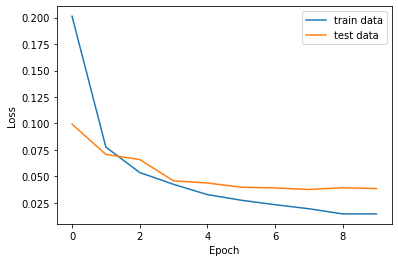

In [ ]:
plt.plot(history.history['loss'], label='train data')
plt.plot(history.history['val_loss'], label='test data')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

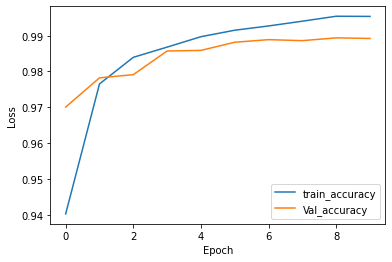

In [ ]:
plt.plot(history.history['accuracy'] , label='train_accuracy')
plt.plot(history.history['val_accuracy'] , label='Val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')

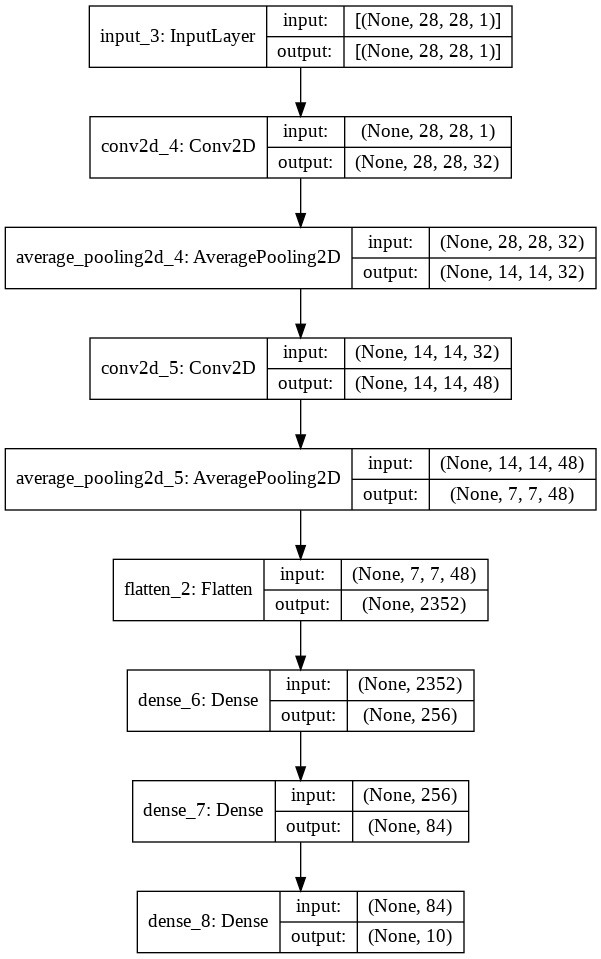

In [71]:
 tf.keras.utils.plot_model(model, show_shapes=True, show_layer_names=True)